# Analyzing data from clusters FAMD

In [40]:
import pandas as pd
import numpy as np
import json
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
# Configuración de pandas 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Loading data

In [41]:
path_file = 'propuesta_cluster.csv'
data = pd.read_csv(path_file)
data.head()

,client_id,loan_id,state,arrears_days,total_paid,Monto Acumulado,Uso de los recursos,Plazo,Sector,Ingresos,Ubicación,Estrato Mínimo,Procesos judiciales,Alertas,Score Bureau Empresa,Huellas de Consulta,Website empresa,Instagram empresa,LinkedIn empresa,LinkedIn empresarios,Edad empresarios,Activador,Número de accionistas,Impacto,Acceso previso a la banca,# Empleados,Mujeres empresarias,Mujeres en cargos directivos,cluster
0,241,1076,LATE,17,147915805,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,925,8,Si,Si,Si,Si,45,Internet,2,No,Si,16,No,2,1
1,241,1244,LATE,23,91852726,250000000,CR,25 a 36 meses,Servicios,Seed,Medellín,5,No,No,925,8,Si,Si,Si,Si,45,Internet,2,No,Si,16,No,2,1
2,362,1469,PAID,14,15211138,50000000,KT - EX,13 a 24 meses,Servicios,Seed,Medellín,3,No,No,924,2,Si,No,Si,No,32,SocialNetworks,3,No,Si,3,No,0,0
3,428,119,LATE,64,8713879,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,861,1,Si,No,Si,Si,44,CreditProfessionalContact,2,No,Si,5,No,0,0
4,428,120,LATE,64,8102608,40000000,SP,13 a 24 meses,Industria,Seed,Medellín,4,No,No,861,1,Si,No,Si,Si,44,CreditProfessionalContact,2,No,Si,5,No,0,0


In [42]:
data.isnull().any()

client_id                       False
loan_id                         False
state                           False
arrears_days                    False
total_paid                      False
Monto Acumulado                 False
Uso de los recursos             False
Plazo                           False
Sector                          False
Ingresos                        False
Ubicación                       False
Estrato Mínimo                  False
Procesos judiciales             False
Alertas                         False
Score Bureau Empresa            False
Huellas de Consulta             False
Website empresa                 False
Instagram empresa               False
LinkedIn empresa                False
LinkedIn empresarios            False
Edad empresarios                False
Activador                       False
Número de accionistas           False
Impacto                         False
Acceso previso a la banca       False
# Empleados                     False
Mujeres empr

## Data analysis

This section is to analyze clusters behaviour with two cathegorization of clients

### Cathegorical data

Text(0.5, 0.98, 'Frecuency of observation by cluster')

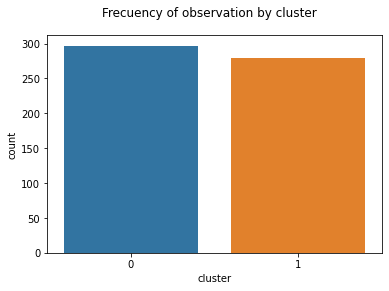

In [74]:
sns.countplot(x='cluster', data = data)
plt.suptitle('Frecuency of observation by cluster')

In [44]:
data['cluster'].value_counts()

0    297
1    280
Name: cluster, dtype: int64

We can see that there are more customers on the cluster_1 than the cluster_0

### Analyzing relationship on other variables with two clusters

In [45]:
#----------------------------------------------------------------

#### Cathegorical = cluster_id_2 vs Quantitative = 'Column name'

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   client_id                     577 non-null    int64 
 1   loan_id                       577 non-null    int64 
 2   state                         577 non-null    object
 3   arrears_days                  577 non-null    int64 
 4   total_paid                    577 non-null    int64 
 5   Monto Acumulado               577 non-null    int64 
 6   Uso de los recursos           577 non-null    object
 7   Plazo                         577 non-null    object
 8   Sector                        577 non-null    object
 9   Ingresos                      577 non-null    object
 10  Ubicación                     577 non-null    object
 11  Estrato Mínimo                577 non-null    int64 
 12  Procesos judiciales           577 non-null    object
 13  Alertas             

Text(0.5, 0.98, 'Cluster vs arrears_days')

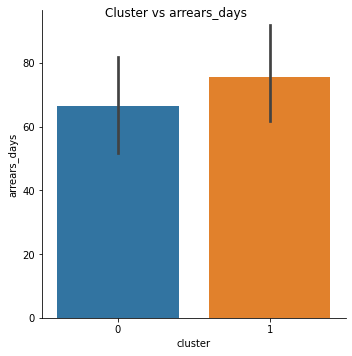

In [47]:
sns.catplot(x='cluster', y='arrears_days', kind='bar', data=data)
plt.suptitle('Cluster vs arrears_days')

On this graph we can see that cluster 1 has less arrears_days than cluster 0

Text(0.5, 0.98, 'Cluster vs Monto Acumulado')

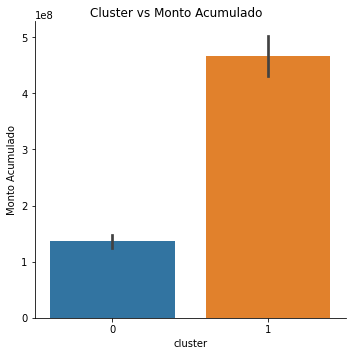

In [48]:
sns.catplot(x='cluster', y='Monto Acumulado', kind='bar', data=data)
plt.suptitle('Cluster vs Monto Acumulado')

Cluster 1 has less 'Monto Acumulado' than cluster 0

Text(0.5, 0.98, 'Cluster vs Score Bureau Empresa')

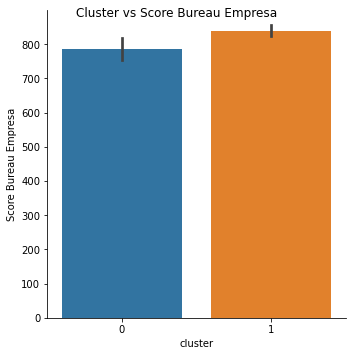

In [49]:
sns.catplot(x='cluster', y='Score Bureau Empresa', kind='bar', data=data)
plt.suptitle('Cluster vs Score Bureau Empresa')

Score Bureau between the two clusters are relatively similar

Text(0.5, 0.98, 'Cluster vs Huellas de Consulta')

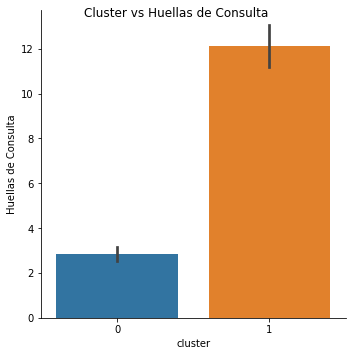

In [50]:
sns.catplot(x='cluster', y='Huellas de Consulta', kind='bar', data=data)
plt.suptitle('Cluster vs Huellas de Consulta')

Cluster 1 has less 'Huellas de consulta' than cluster 0

Text(0.5, 0.98, 'Cluster vs Número de accionistas')

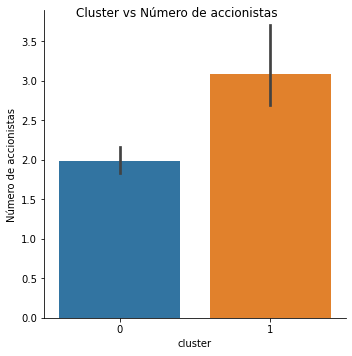

In [51]:
sns.catplot(x='cluster', y='Número de accionistas', kind='bar', data=data)
plt.suptitle('Cluster vs Número de accionistas')

Cluster 0 has more 'Accionistas' than cluster 1

Text(0.5, 0.98, 'Cluster vs # Empleados')

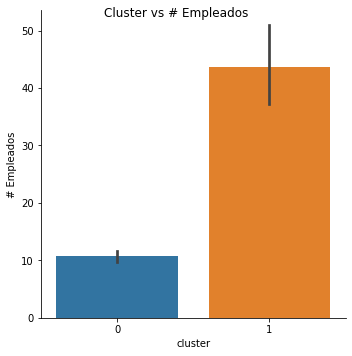

In [52]:
sns.catplot(x='cluster', y='# Empleados', kind='bar', data=data)
plt.suptitle('Cluster vs # Empleados')

Cluster 1 has more 'Empleados' than cluster 0

Text(0.5, 0.98, 'Cluster vs Mujeres en cargos directivos')

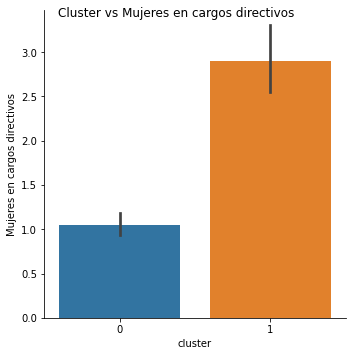

In [53]:
sns.catplot(x='cluster', y='Mujeres en cargos directivos', kind='bar', data=data)
plt.suptitle('Cluster vs Mujeres en cargos directivos')

Cluster 1 has more 'Mujeres en cargos directivos' than cluster 0

In [54]:
#--------------------------------------------------------

#### Cathegorical = cluster_id_2 vs Cathegorical = 'Column name'

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   client_id                     577 non-null    int64 
 1   loan_id                       577 non-null    int64 
 2   state                         577 non-null    object
 3   arrears_days                  577 non-null    int64 
 4   total_paid                    577 non-null    int64 
 5   Monto Acumulado               577 non-null    int64 
 6   Uso de los recursos           577 non-null    object
 7   Plazo                         577 non-null    object
 8   Sector                        577 non-null    object
 9   Ingresos                      577 non-null    object
 10  Ubicación                     577 non-null    object
 11  Estrato Mínimo                577 non-null    int64 
 12  Procesos judiciales           577 non-null    object
 13  Alertas             

In [56]:
data.groupby('cluster')['state'].value_counts()/len(data)

cluster  state
0        PAID     0.284229
         LATE     0.230503
1        LATE     0.261698
         PAID     0.223570
Name: state, dtype: float64

Cluster 0 has more clients on state PAID than cluster 1, but at the same time has more clients on Late than cluster 1

In [57]:
data.groupby('cluster')['Uso de los recursos'].value_counts()/len(data)

cluster  Uso de los recursos
0        KT - CO                0.207972
         KT - EX                0.166378
         CR                     0.081456
         SP                     0.058925
1        KT - EX                0.181976
         KT - CO                0.166378
         CR                     0.081456
         SP                     0.055459
Name: Uso de los recursos, dtype: float64

We can see the distribution between the two clusters

In [58]:
data.groupby('cluster')['Plazo'].value_counts()/len(data)

cluster  Plazo            
0        13 a 24 meses        0.313692
         Menos de 12 meses    0.128250
         25 a 36 meses        0.069324
         Más de 37 meses      0.003466
1        13 a 24 meses        0.194107
         Menos de 12 meses    0.190641
         25 a 36 meses        0.084922
         Más de 37 meses      0.015598
Name: Plazo, dtype: float64

In [59]:
# Cluster 0 has more clients on 'Plazo' on 13 to 24 months. On the other hand we have cluster 1 with 'Plazo' less than 12 months

In [60]:
data.groupby('cluster')['Sector'].value_counts()/len(data)

cluster  Sector   
0        Servicios    0.346620
         Comercio     0.093588
         Industria    0.074523
1        Servicios    0.251300
         Industria    0.166378
         Comercio     0.067591
Name: Sector, dtype: float64

In [61]:
# Cluster 0 has a ranking of (Servicios, Comercio and Industria) - Cluster 1 has a ranking of (Servicios, Industria y Comercio)

In [62]:
data.groupby('cluster')['Ingresos'].value_counts()/len(data)

cluster  Ingresos
0        Seed        0.344887
         Venture     0.121317
         Scale Up    0.041594
         Growth      0.006932
1        Venture     0.175043
         Scale Up    0.117851
         Growth      0.100520
         Seed        0.091854
Name: Ingresos, dtype: float64

In [63]:
data.groupby('cluster')['Acceso previso a la banca'].value_counts()/len(data)

cluster  Acceso previso a la banca
0        Si                           0.265165
         No                           0.249567
1        Si                           0.438475
         No                           0.046794
Name: Acceso previso a la banca, dtype: float64

In [64]:
data.groupby('cluster')['Mujeres empresarias'].value_counts()/len(data)

cluster  Mujeres empresarias
0        No                     0.396880
         Si                     0.117851
1        No                     0.409012
         Si                     0.076256
Name: Mujeres empresarias, dtype: float64

In [65]:
data.groupby('cluster')['Activador'].value_counts()/len(data)

cluster  Activador                
0        FriendOrColleague            0.166378
         Internet                     0.088388
         CreditProfessionalContact    0.060659
         Other                        0.055459
         Newspapers                   0.045061
         SocialNetworks               0.038128
         Referrer                     0.032929
         CommunicationMedia           0.012132
         RutaN                        0.008666
         Fenalco                      0.006932
1        Other                        0.143847
         FriendOrColleague            0.131716
         CreditProfessionalContact    0.095321
         Internet                     0.058925
         Newspapers                   0.024263
         Email                        0.012132
         SocialNetworks               0.012132
         Referrer                     0.006932
Name: Activador, dtype: float64

In [66]:
data.groupby('cluster')['Website empresa'].value_counts()/len(data)

cluster  Website empresa
0        Si                 0.310225
         No                 0.204506
1        Si                 0.391681
         No                 0.093588
Name: Website empresa, dtype: float64

In [67]:
data.groupby('cluster')['Estrato Mínimo'].value_counts()/len(data)

cluster  Estrato Mínimo
0        5                 0.157712
         4                 0.155979
         3                 0.109185
         6                 0.084922
         2                 0.006932
1        4                 0.171577
         5                 0.157712
         6                 0.103986
         3                 0.051993
Name: Estrato Mínimo, dtype: float64

In [68]:
data.groupby('cluster')['Ubicación'].value_counts()/len(data)

cluster  Ubicación          
0        Bogotá D.C.            0.214905
         Medellín               0.201040
         Barranquilla           0.024263
         Envigado               0.020797
         Cali                   0.015598
         Bucaramanga            0.010399
         Pereira                0.005199
         La Estrella            0.003466
         Manizales              0.003466
         Armenia                0.001733
         Cartagena de indias    0.001733
         Copacabana             0.001733
         Itagüí                 0.001733
         La Ceja                0.001733
         Marinilla              0.001733
         Rionegro               0.001733
         Sabaneta               0.001733
         Santa Marta            0.001733
1        Bogotá D.C.            0.192374
         Medellín               0.162912
         La Estrella            0.036395
         Itagüí                 0.034662
         Sabaneta               0.019064
         Envigado           

In [69]:
data.groupby('cluster')['Procesos judiciales'].value_counts()/len(data)

cluster  Procesos judiciales
0        No                     0.483536
         Si                     0.031196
1        No                     0.358752
         Si                     0.126516
Name: Procesos judiciales, dtype: float64

In [70]:
data.groupby('cluster')['Instagram empresa'].value_counts()/len(data)

cluster  Instagram empresa
0        No                   0.280763
         Si                   0.233969
1        Si                   0.256499
         No                   0.228769
Name: Instagram empresa, dtype: float64

In [71]:
data.groupby('cluster')['Impacto'].value_counts()/len(data)

cluster  Impacto
0        No         0.462738
         Si         0.051993
1        No         0.455806
         Si         0.029463
Name: Impacto, dtype: float64

### Analyzing relationship on other variables with three clusters

This section is to analyze clusters behaviour with three cathegorization of clients

### Cathegorical data

#### Cathegorical = cluster_id_2 vs Quantitative = 'Column name'

In [72]:
data.columns

Index(['client_id', 'loan_id', 'state', 'arrears_days', 'total_paid', 'Monto Acumulado', 'Uso de los recursos', 'Plazo', 'Sector', 'Ingresos', 'Ubicación', 'Estrato Mínimo', 'Procesos judiciales', 'Alertas', 'Score Bureau Empresa', 'Huellas de Consulta', 'Website empresa', 'Instagram empresa', 'LinkedIn empresa', 'LinkedIn empresarios', 'Edad empresarios', 'Activador', 'Número de accionistas', 'Impacto', 'Acceso previso a la banca', '# Empleados', 'Mujeres empresarias', 'Mujeres en cargos directivos', 'cluster'], dtype='object')

In [73]:
sns.countplot(x='cluster_id_3', data = data)
plt.suptitle('Frecuency of observation by cluster_id_3')

ValueError: Could not interpret input 'cluster_id_3'

### Analyzing relationship on other variables with three clusters

In [ ]:
#--------------------------------------------------------------------

#### Cathegorical = cluster_id_3 vs Quantitative = 'Column name'

In [ ]:
sns.catplot(x='cluster_id_3', y='arrears_days', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs arrears_days')

In [ ]:
sns.catplot(x='cluster_id_3', y='Monto Acumulado', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs Monto Acumulado')

In [ ]:
sns.catplot(x='cluster_id_3', y='Score Bureau Empresa', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs Score Bureau Empresa')

In [ ]:
sns.catplot(x='cluster_id_3', y='Número de accionistas', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs Número de accionistas')

In [ ]:
sns.catplot(x='cluster_id_3', y='# Empleados', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs # Empleados')

In [ ]:
sns.catplot(x='cluster_id_3', y='Mujeres en cargos directivos', kind='bar', data=data)
plt.suptitle('Cluster_id_3 vs Mujeres en cargos directivos')

In [ ]:
data.info()

In [ ]:
data.columns

### Multi-linear regression

In [ ]:
X = data[['Huellas de Consulta', 'Score Bureau Empresa']]
Y = data['arrears_days']
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)